In [ ]:
!pip install yfinance

In [ ]:
#importing libraries
import math
import pandas as pd
import yfinance as yf # Import yfinance instead of pandas_datareader
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Get the stock quote
# Use yfinance to download data
df = yf.download('KO', start='2012-01-01', end='2020-12-31')

/tmp/ipython-input-155-2485373168.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('KO', start='2012-01-01', end='2020-12-31')
[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,KO,KO,KO,KO,KO
Date,,,,,
2012-01-03,23.089207,23.276843,23.076039,23.092499,15639600
2012-01-04,22.944374,23.066174,22.878538,23.013506,14239200
2012-01-05,22.835733,23.000327,22.829148,22.964116,14287600
2012-01-06,22.690901,22.921331,22.588853,22.868662,13646600
2012-01-09,22.690901,22.769905,22.648107,22.713944,10522600
...,...,...,...,...,...
2020-12-23,46.340721,46.611360,46.218493,46.227226,7040300
2020-12-24,46.655003,46.751037,46.288329,46.288329,3265500


In [ ]:
df.shape

(2264, 5)

Text(0, 0.5, 'Close Price USD ($)')

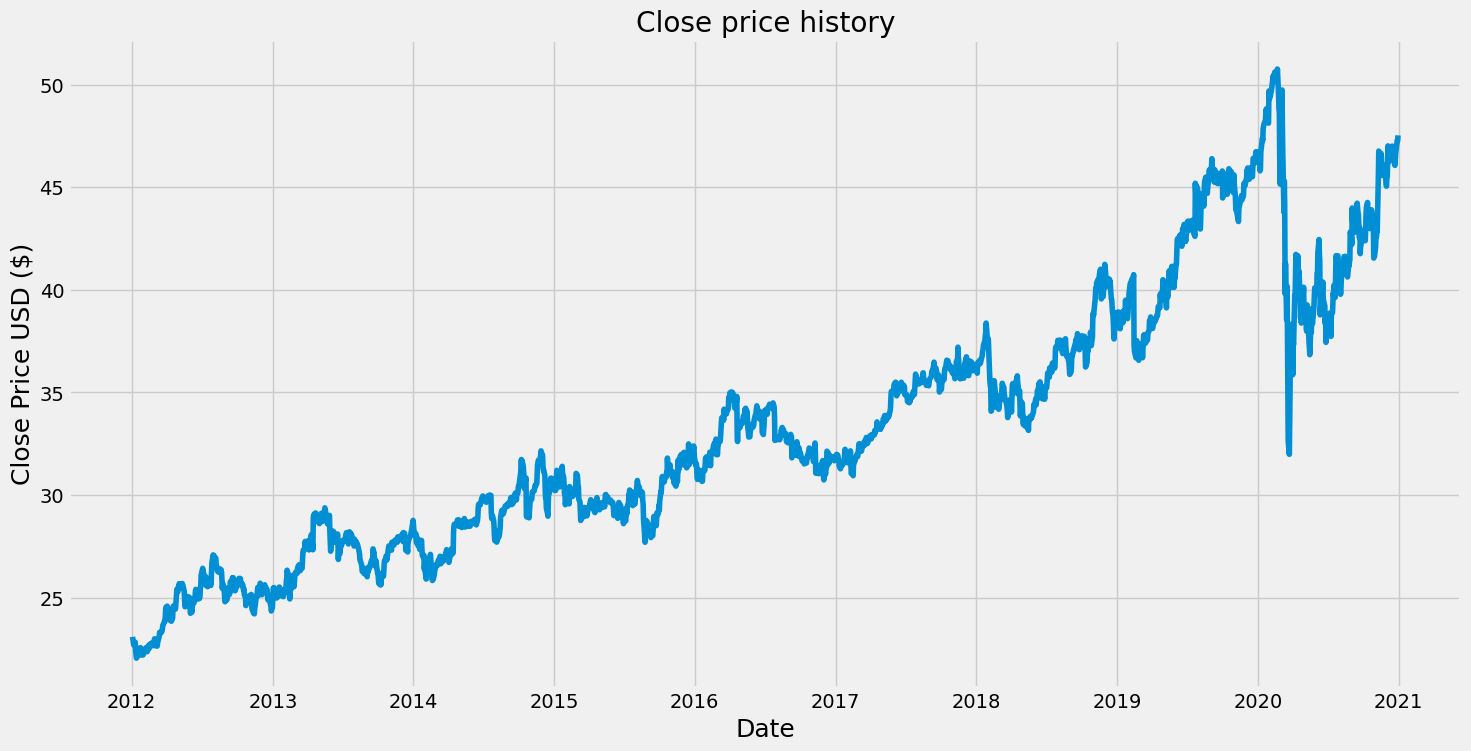

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)

In [ ]:
#Create new dataframe with only the "close" column
data= df.filter(['Close'])
#Convert the dataframe to numy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len= math.ceil( len(dataset)* .8)

In [ ]:
training_data_len

1812

In [ ]:
#Create new dataframe with only the "close" column
data = df[['Close']]  # Use double brackets to select the column as a DataFrame

#Convert the dataframe to numpy array
dataset = data.values

# Scaling the data for preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))

# Ensure 'dataset' is a 2D array
if len(dataset.shape) == 1:
    dataset = dataset.reshape(-1, 1)

scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.0361223 ],
       [0.03107699],
       [0.02729244],
       ...,
       [0.87894578],
       [0.87803338],
       [0.88746131]])

In [ ]:
#Create the training data
#Create the scaled training data set
train_data= scaled_data[0:training_data_len, :]
#Spit the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.0361223 , 0.03107699, 0.02729244, 0.02224712, 0.02224712,
       0.02694859, 0.01227017, 0.00665125, 0.        , 0.00412826,
       0.00688055, 0.00527488, 0.01261415, 0.01766013, 0.01043534,
       0.01651345, 0.01169683, 0.00516059, 0.00538976, 0.00619253,
       0.0098618 , 0.00963264, 0.01249974, 0.01192646, 0.01788936,
       0.01536664, 0.01123837, 0.01089413, 0.0166278 , 0.02190301,
       0.01616934, 0.02144422, 0.02362296, 0.02098543, 0.02591653,
       0.02511362, 0.02304943, 0.02110024, 0.02132954, 0.03291149,
       0.02993004, 0.02511362, 0.02568743, 0.0202974 , 0.02064118,
       0.02614569, 0.02889798, 0.03623698, 0.04328358, 0.04293721,
       0.04420794, 0.04224407, 0.04501622, 0.04721078, 0.05333328,
       0.05679844, 0.05760725, 0.06234354, 0.06199664, 0.07112231])]
[np.float64(0.08440601267860248)]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# ---------------------- Reshape for LSTM ----------------------

# LSTM expects input in shape: (samples, time_steps, features)
x_train_lstm = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

# ---------------------- Build LSTM Model ----------------------
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train_lstm.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# ---------------------- Compile & Train ----------------------

model.compile(optimizer='adam', loss='mse')
model.fit(x_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0215
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0014
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0012
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0011
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0014
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0011
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 9.2966e-04
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0010
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 7.9129e-04
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 9.4494e-04


In [ ]:
#Convert the data to a numpy array
test_data = scaled_data[training_data_len - 60: , :]

In [ ]:
x_test= []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


/tmp/ipython-input-169-2918448832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


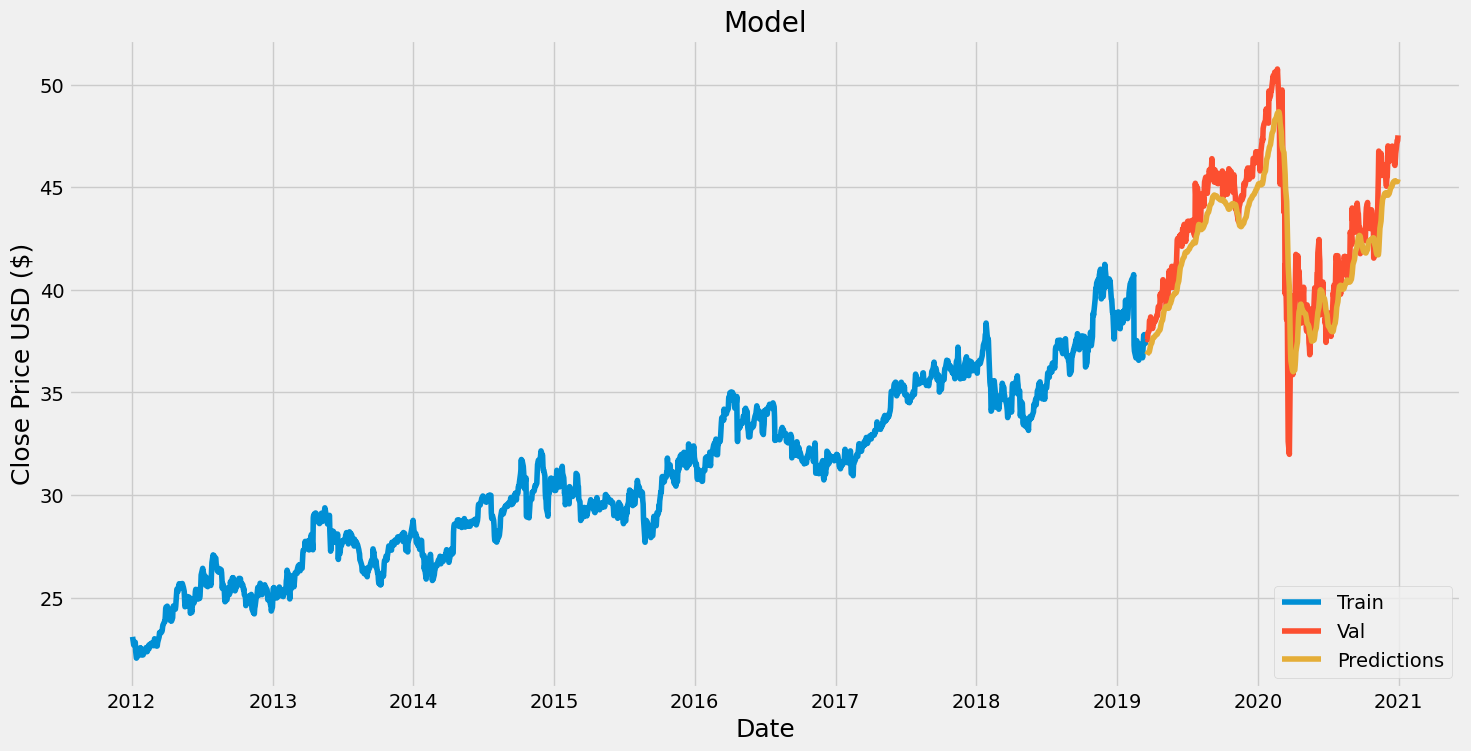

In [ ]:
#PLot the data
train= data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid(actual) and predicted prices
valid

Price,Close,Predictions
Ticker,KO,
Date,,
2019-03-19,37.603607,36.838272
2019-03-20,37.578846,36.872112
2019-03-21,37.562336,36.901745
2019-03-22,37.908989,36.926441
2019-03-25,37.991531,36.966999
...,...,...
2020-12-23,46.340721,45.289860
2020-12-24,46.655003,45.271431


In [ ]:

# Define a percentage threshold for accuracy (e.g., 5%)
threshold_percentage = 0.05  # 5%

# Calculate the absolute differences between predictions and actual values
differences = np.abs(predictions - y_test)

# Calculate the acceptable threshold for each actual value
thresholds = y_test * threshold_percentage

# Count the number of predictions within the threshold
accurate_predictions = np.sum(differences <= thresholds)

# Calculate accuracy as a percentage
accuracy = (accurate_predictions / len(y_test)) * 100

print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 86.95%
